# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# read data from file 

In [ ]:
data = pd.read_parquet("../data/yellow_tripdata_2025-03.parquet")

In [3]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.90,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.50,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.90,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.20,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.60,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145252,2,2025-03-31 23:10:10,2025-03-31 23:42:49,NaN,10.04,NaN,None,177,205,0,45.98,0.00,0.5,0.00,0.0,1.0,47.48,NaN,NaN,0.00
4145253,2,2025-03-31 23:14:47,2025-03-31 23:32:05,NaN,3.01,NaN,None,186,140,0,21.70,0.00,0.5,0.00,0.0,1.0,26.45,NaN,NaN,0.75
4145254,2,2025-03-31 23:18:16,2025-03-31 23:40:15,NaN,7.44,NaN,None,48,243,0,31.97,0.00,0.5,0.00,0.0,1.0,36.72,NaN,NaN,0.75
4145255,2,2025-03-31 23:30:16,2025-03-31 23:52:23,NaN,4.99,NaN,None,68,262,0,-4.75,0.00,0.5,0.00,0.0,1.0,6.14,NaN,NaN,0.75


In [4]:
data.shape

(4145257, 20)

# Date exploration

In [5]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [6]:
taxi_data = data[
    [
        "tpep_pickup_datetime",
        "tpep_dropoff_datetime",
        "passenger_count",
        "trip_distance",
        "RatecodeID",
        "PULocationID",
        "DOLocationID",
        "payment_type",
        "total_amount",
    ]
]

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,140,236,1,15.50
1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,140,262,1,13.80
2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,161,68,1,25.81
3,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,231,13,1,15.54
4,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,163,236,1,17.20


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

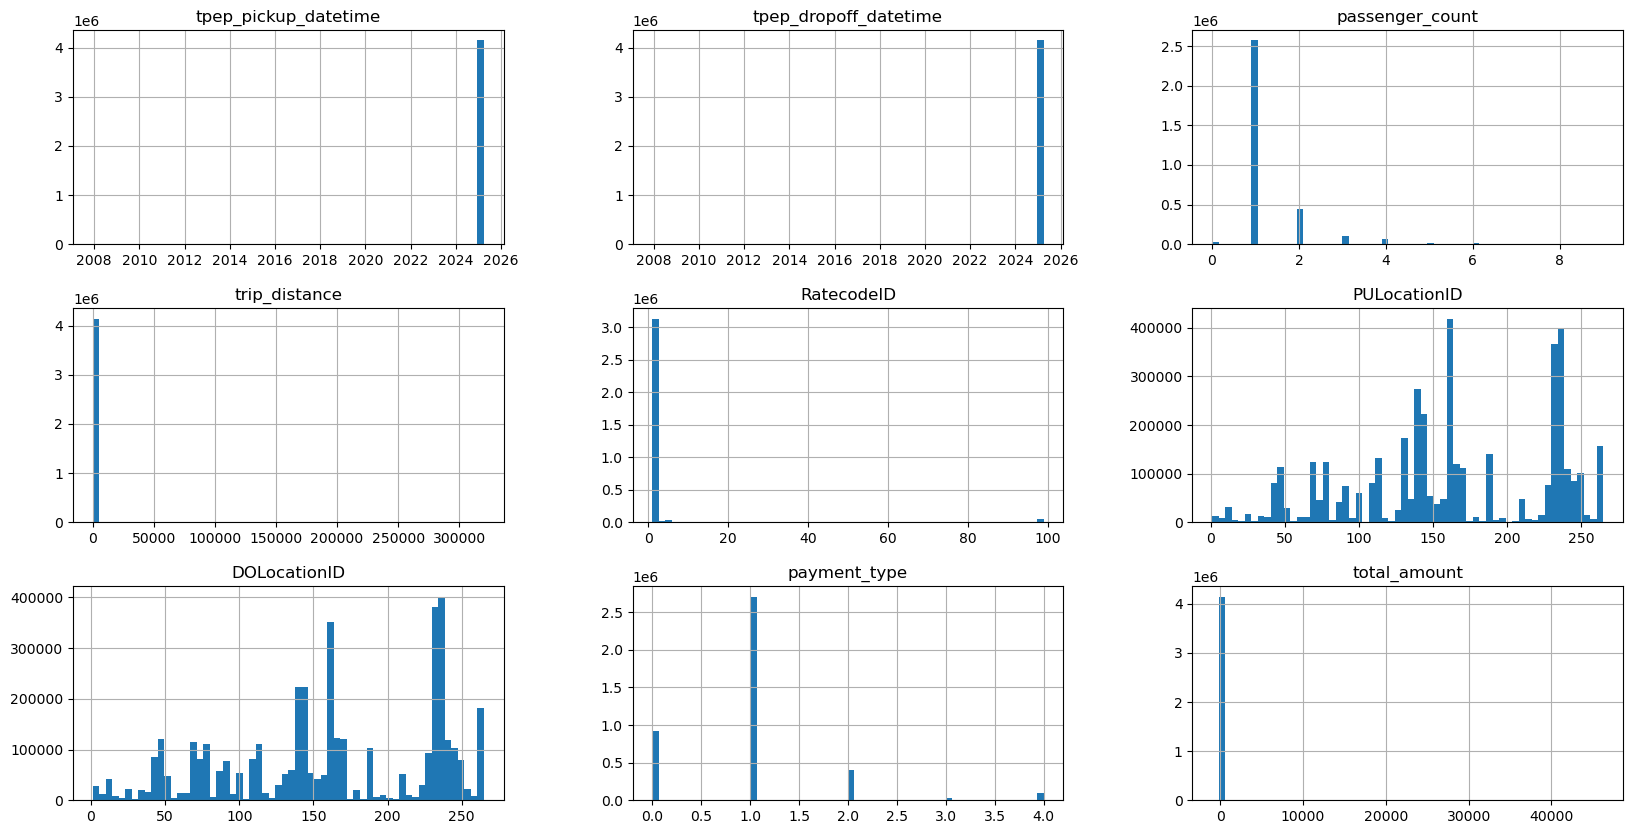

In [8]:
taxi_data.hist(figsize=(20, 10), bins=60)

In [9]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0     3021866
2.0      112287
99.0      43988
5.0       32008
3.0       10605
4.0        7837
6.0           3
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

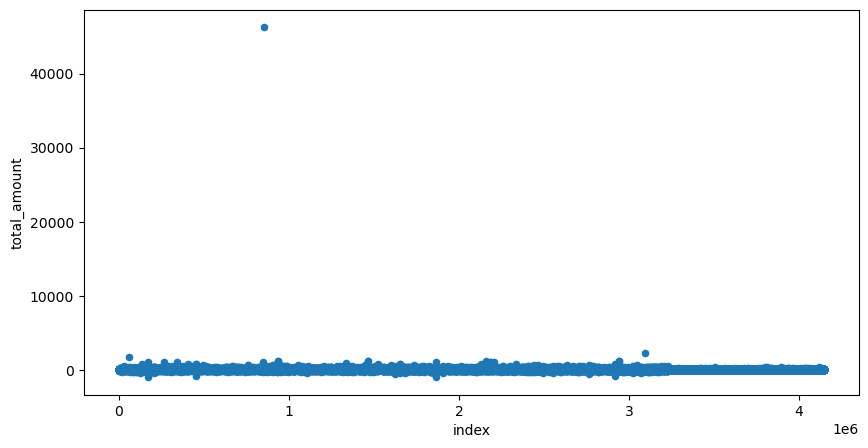

In [10]:
taxi_data.reset_index().plot(
    kind="scatter", x="index", y="total_amount", figsize=(10, 5)
)

<Axes: xlabel='index', ylabel='total_amount'>

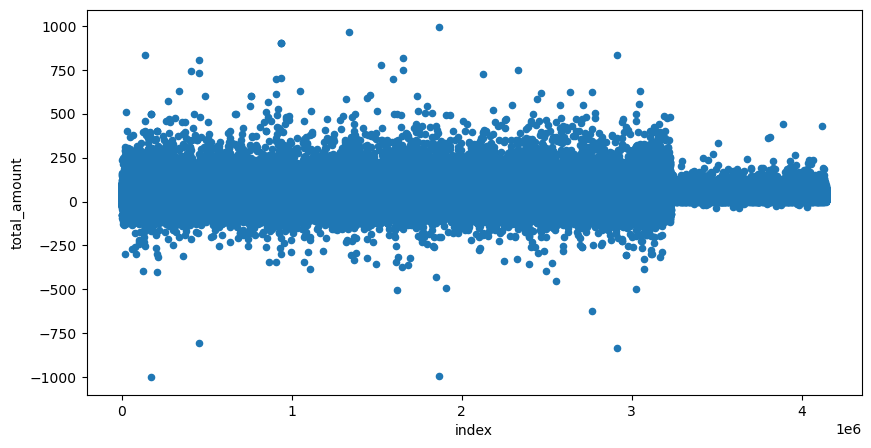

In [11]:
taxi_data[taxi_data["total_amount"] < 1000].reset_index().plot(
    kind="scatter", x="index", y="total_amount", figsize=(10, 5)
)

Two things to deal with: negative values and very high values. Let's first look at negative values.

(68686, 9)


<Axes: xlabel='index', ylabel='total_amount'>

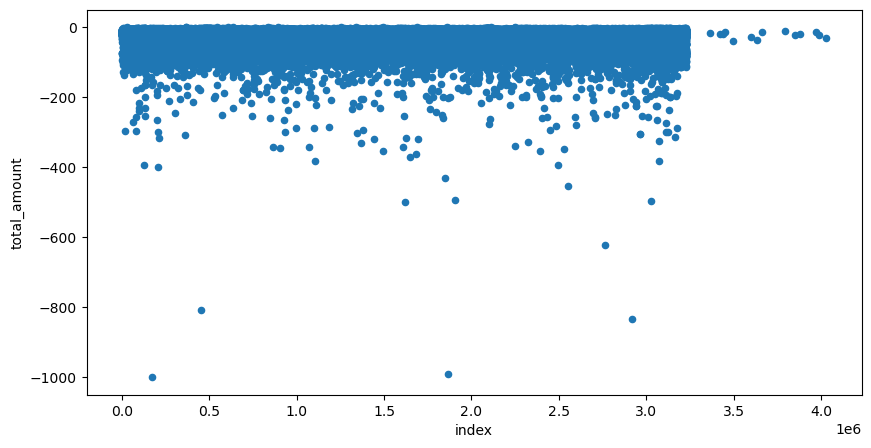

In [12]:
print(taxi_data[taxi_data["total_amount"] < 0].shape)
taxi_data[taxi_data["total_amount"] < 0].reset_index().plot(
    kind="scatter", y="total_amount", x="index", figsize=(10, 5)
)

In [13]:
taxi_data[taxi_data["total_amount"] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
112,2025-03-01 00:03:53,2025-03-01 00:11:31,1.0,1.66,1.0,114,68,4,-15.75
157,2025-03-01 00:46:20,2025-03-01 00:46:26,1.0,0.01,2.0,163,163,2,-74.75
362,2025-03-01 00:07:57,2025-03-01 00:13:36,1.0,0.79,1.0,186,246,4,-12.95
423,2025-03-01 00:08:03,2025-03-01 00:33:51,2.0,4.59,1.0,144,170,4,-33.25
503,2025-03-01 00:28:29,2025-03-01 00:34:56,1.0,1.10,1.0,229,164,4,-14.35


In [14]:
taxi_data[taxi_data["total_amount"] < 0]["payment_type"].value_counts()

payment_type
4    42896
2    17032
3     8719
1       25
0       14
Name: count, dtype: int64

<Axes: >

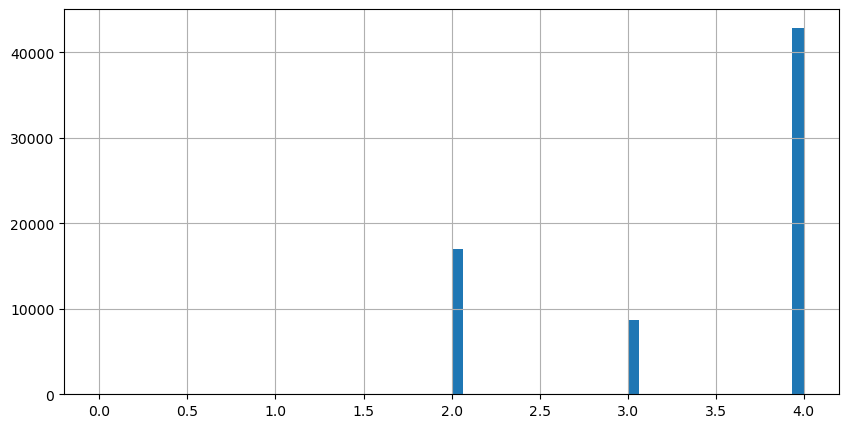

In [15]:
taxi_data[taxi_data["total_amount"] < 0]["payment_type"].hist(bins=60, figsize=(10, 5))

In [16]:
print(taxi_data[taxi_data["total_amount"] == 0].shape)
taxi_data[taxi_data["total_amount"] == 0].head()

(601, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
14996,2025-03-01 04:27:20,2025-03-01 04:28:00,1.0,0.85,1.0,80,80,2,0.0
41557,2025-03-01 13:14:34,2025-03-01 13:14:47,1.0,0.00,1.0,145,145,3,0.0
51415,2025-03-01 15:35:38,2025-03-01 15:36:02,1.0,0.00,1.0,262,262,3,0.0
58747,2025-03-01 16:17:50,2025-03-01 16:26:12,1.0,1.40,1.0,43,237,3,0.0
86303,2025-03-01 19:06:10,2025-03-01 19:19:50,1.0,13.35,1.0,135,226,2,0.0


<Axes: >

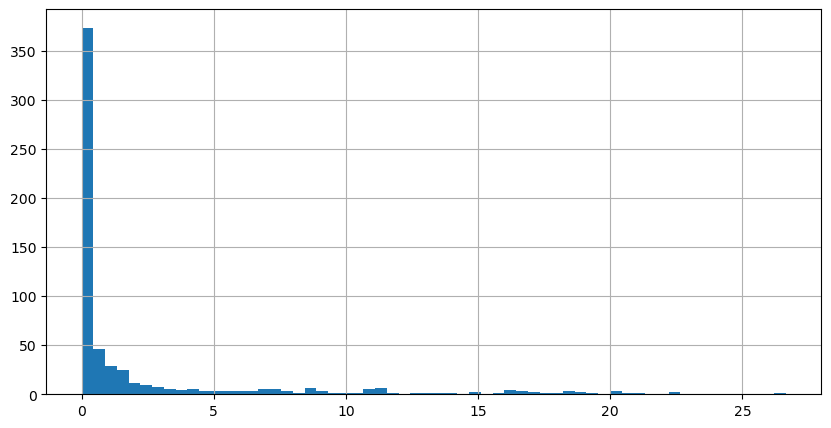

In [17]:
taxi_data[taxi_data["total_amount"] == 0]["trip_distance"].hist(
    bins=60, figsize=(10, 5)
)

In [18]:
taxi_data[taxi_data["total_amount"] < 0]["trip_distance"].value_counts()

trip_distance
0.00     4970
0.01      933
0.02      644
0.03      515
0.04      351
         ... 
20.80       1
41.40       1
27.90       1
35.21       1
24.16       1
Name: count, Length: 2697, dtype: int64

We can safely get rid of the negative values. What about the very high values?

<Axes: xlabel='index', ylabel='total_amount'>

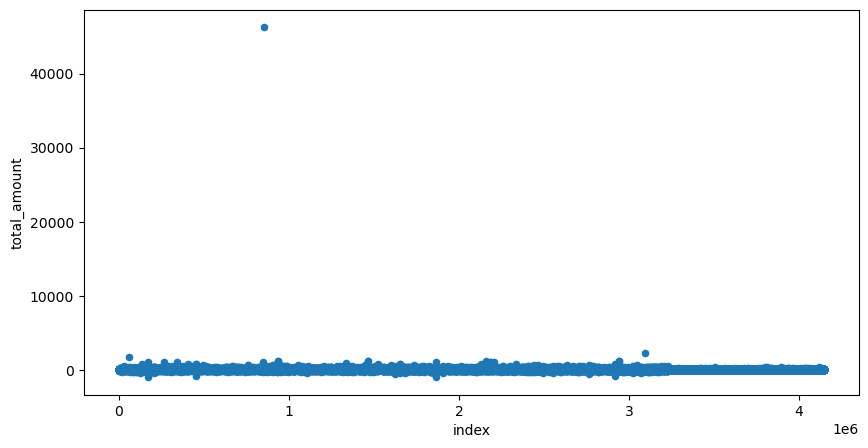

In [19]:
taxi_data.reset_index().plot(
    kind="scatter", y="total_amount", x="index", figsize=(10, 5)
)

In [20]:
taxi_data[taxi_data["total_amount"] > 200].shape

(2112, 9)

In [21]:
taxi_data["total_amount"].mean()

np.float64(26.26589804685213)

# Data Cleaning

## based on your data analysis figure out thing you wanna model to predict 
## Here, I have decide specific range within certain affordable price under $200 

In [22]:
taxi_data_filtered = taxi_data[
    (taxi_data["total_amount"] >= 0) & (taxi_data["total_amount"] <= 200)
]

In [23]:
print(taxi_data.shape)
taxi_data_filtered.shape

(4145257, 9)


(4074459, 9)

checking missing values

In [24]:
taxi_data_filtered.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          916629
trip_distance                 0
RatecodeID               916629
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [25]:
total_rows = len(taxi_data_filtered)
missing_proportion = (
    taxi_data_filtered[["passenger_count", "RatecodeID"]].isna().sum() / total_rows
)
print(missing_proportion * 100)

passenger_count    22.49695
RatecodeID         22.49695
dtype: float64


In [26]:
# Impute with mode
taxi_data_filtered["passenger_count"].fillna(
    taxi_data_filtered["passenger_count"].mode()[0], inplace=True
)
taxi_data_filtered["RatecodeID"].fillna(
    taxi_data_filtered["RatecodeID"].mode()[0], inplace=True
)

/tmp/ipykernel_7452/1234694947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_data_filtered['passenger_count'].fillna(taxi_data_filtered['passenger_count'].mode()[0], inplace=True)
/tmp/ipykernel_7452/1234694947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered['passenger_count'].fillna(taxi_data_filtered['passen

# Data preparation

In [27]:
taxi_data_prepared = taxi_data_filtered.copy()

Making sure everything is in the right type

In [28]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [29]:
taxi_data_prepared.loc[:, "RatecodeID"] = taxi_data_prepared["RatecodeID"].astype(str)
taxi_data_prepared.loc[:, "PULocationID"] = taxi_data_prepared["PULocationID"].astype(
    str
)
taxi_data_prepared.loc[:, "DOLocationID"] = taxi_data_prepared["DOLocationID"].astype(
    str
)
taxi_data_prepared.loc[:, "payment_type"] = taxi_data_prepared["payment_type"].astype(
    str
)

/tmp/ipykernel_7452/2820828323.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
/tmp/ipykernel_7452/2820828323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['140' '140' '161' ... '48' '68' '144']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
/tmp/ipykernel_7452/2820828323.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['236' '262' '68' ... '243' '262' '42']' has dtype incompatible with int32, please explicitly

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into the formats we need them

In [31]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,140,236,1,15.50
1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,140,262,1,13.80
2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,161,68,1,25.81
3,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,231,13,1,15.54
4,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,163,236,1,17.20


In [32]:
taxi_data_prepared["transaction_date"] = pd.to_datetime(
    taxi_data_prepared["tpep_pickup_datetime"].dt.date
)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared["transaction_year"] = taxi_data_prepared[
    "tpep_pickup_datetime"
].dt.year
taxi_data_prepared["transaction_month"] = taxi_data_prepared[
    "tpep_pickup_datetime"
].dt.month
taxi_data_prepared["transaction_day"] = taxi_data_prepared[
    "tpep_pickup_datetime"
].dt.day
taxi_data_prepared["transaction_hour"] = taxi_data_prepared[
    "tpep_pickup_datetime"
].dt.hour

In [33]:
taxi_data_prepared

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,140,236,1,15.50,2025-03-01,2025,3,1,0
1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,140,262,1,13.80,2025-03-01,2025,3,1,0
2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,161,68,1,25.81,2025-03-01,2025,3,1,0
3,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,231,13,1,15.54,2025-03-01,2025,3,1,0
4,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,163,236,1,17.20,2025-03-01,2025,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145252,2025-03-31 23:10:10,2025-03-31 23:42:49,1.0,10.04,1.0,177,205,0,47.48,2025-03-31,2025,3,31,23
4145253,2025-03-31 23:14:47,2025-03-31 23:32:05,1.0,3.01,1.0,186,140,0,26.45,2025-03-31,2025,3,31,23
4145254,2025-03-31 23:18:16,2025-03-31 23:40:15,1.0,7.44,1.0,48,243,0,36.72,2025-03-31,2025,3,31,23
4145255,2025-03-31 23:30:16,2025-03-31 23:52:23,1.0,4.99,1.0,68,262,0,6.14,2025-03-31,2025,3,31,23


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

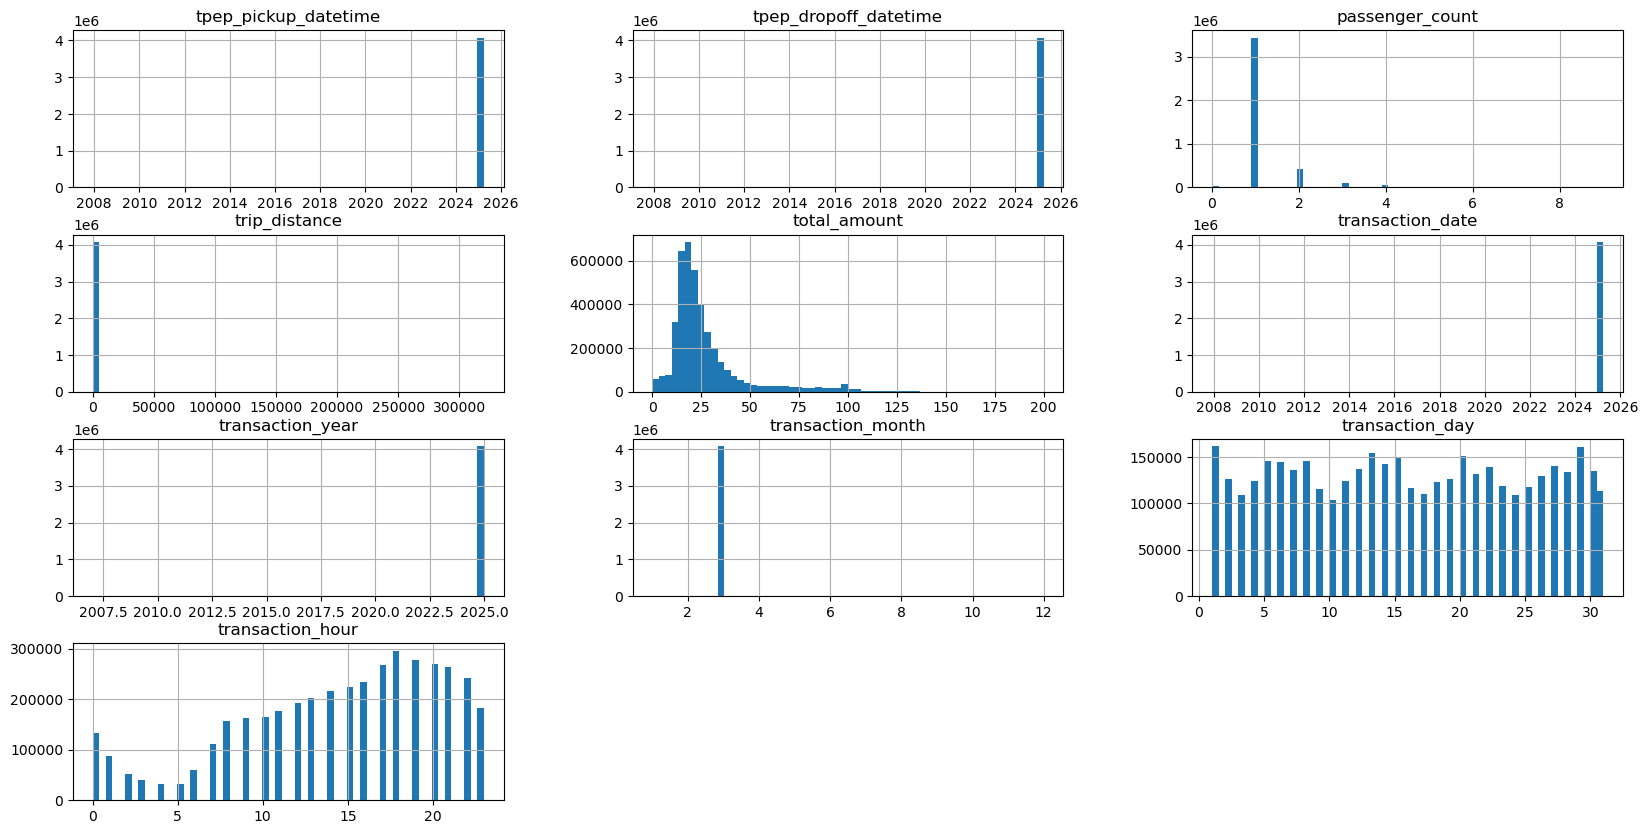

In [34]:
taxi_data_prepared.hist(bins=60, figsize=(20, 10))

In [35]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared["transaction_year"] == 2025]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared["transaction_month"] == 3]

Noting down categorical and numerical columns

In [36]:
categorial_columns = [
    "PULocationID",
    "transaction_date",
    "transaction_month",
    "transaction_day",
    "transaction_hour",
]
numerical_columns = ["trip_distance", "total_amount"]
all_needed_columns = categorial_columns + numerical_columns

In [37]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(4074426, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,140,2025-03-01,3,1,0,0.90,15.50
1,140,2025-03-01,3,1,0,0.60,13.80
2,161,2025-03-01,3,1,0,1.94,25.81
3,231,2025-03-01,3,1,0,0.95,15.54
4,163,2025-03-01,3,1,0,1.50,17.20


Aggregate data points

Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [38]:
taxi_grouped_by_region = main_taxi_df.groupby(categorial_columns).mean().reset_index()
taxi_grouped_by_region["count_of_transaction"] = (
    main_taxi_df.groupby(categorial_columns).count().reset_index()["total_amount"]
)
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(122501, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2025-03-01,3,1,5,0.00,0.75,1
1,1,2025-03-01,3,1,7,0.00,184.40,1
2,1,2025-03-01,3,1,13,0.07,128.00,1
3,1,2025-03-01,3,1,14,0.00,111.00,1
4,1,2025-03-01,3,1,17,0.00,61.20,1


<Axes: >

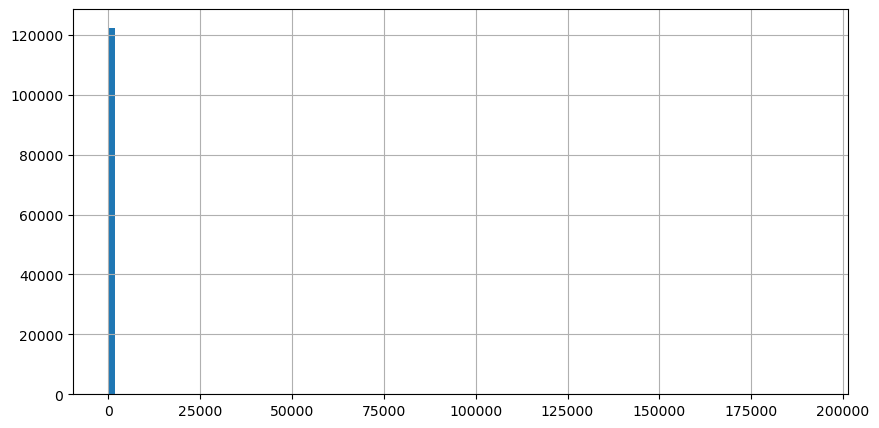

In [39]:
taxi_grouped_by_region["trip_distance"].hist(figsize=(10, 5), bins=100)

<Axes: >

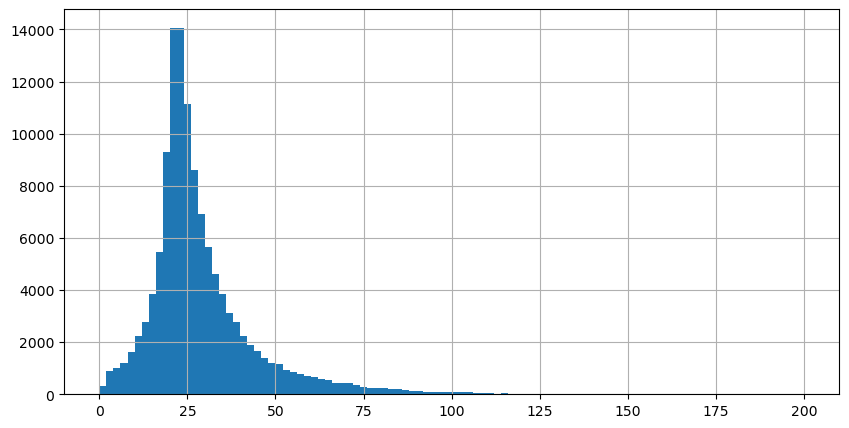

In [40]:
taxi_grouped_by_region["total_amount"].hist(figsize=(10, 5), bins=100)

# Benchmark model

In [41]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [42]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2025-03-01,3,1,5,0.00,0.75,1
1,1,2025-03-01,3,1,7,0.00,184.40,1
2,1,2025-03-01,3,1,13,0.07,128.00,1
3,1,2025-03-01,3,1,14,0.00,111.00,1
4,1,2025-03-01,3,1,17,0.00,61.20,1
...,...,...,...,...,...,...,...,...
122496,98,2025-03-31,3,31,11,8.80,35.00,1
122497,98,2025-03-31,3,31,17,6.53,29.81,1
122498,98,2025-03-31,3,31,20,4.69,23.53,1
122499,98,2025-03-31,3,31,22,4.64,27.92,2


In [43]:
categorial_features_benchmark = [
    "PULocationID",
    "transaction_month",
    "transaction_day",
    "transaction_hour",
]
input_features_benchmark = categorial_features_benchmark + ["trip_distance"]
target_features_benchmark = "total_amount"

# Train-test split

In [44]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bench, y_bench, test_size=0.3, random_state=42
)

# fit a model to the data

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

# Model Evaluation

In [46]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print(f"mean_absolute_error : {mean_absolute_error(y_test_b, y_pred_b)}")
print(f"mean_squared_error : {mean_squared_error(y_test_b, y_pred_b)}")
print(f"root_mean_squared_error : {sqrt(mean_squared_error(y_test_b, y_pred_b))}")
print(f"r2 : {r2_score(y_test_b, y_pred_b)}")

mean_absolute_error : 6.109579550183476
mean_squared_error : 119.12376358056135
root_mean_squared_error : 10.91438333487336
r2 : 0.5401993574490971


<Axes: xlabel='true', ylabel='pred'>

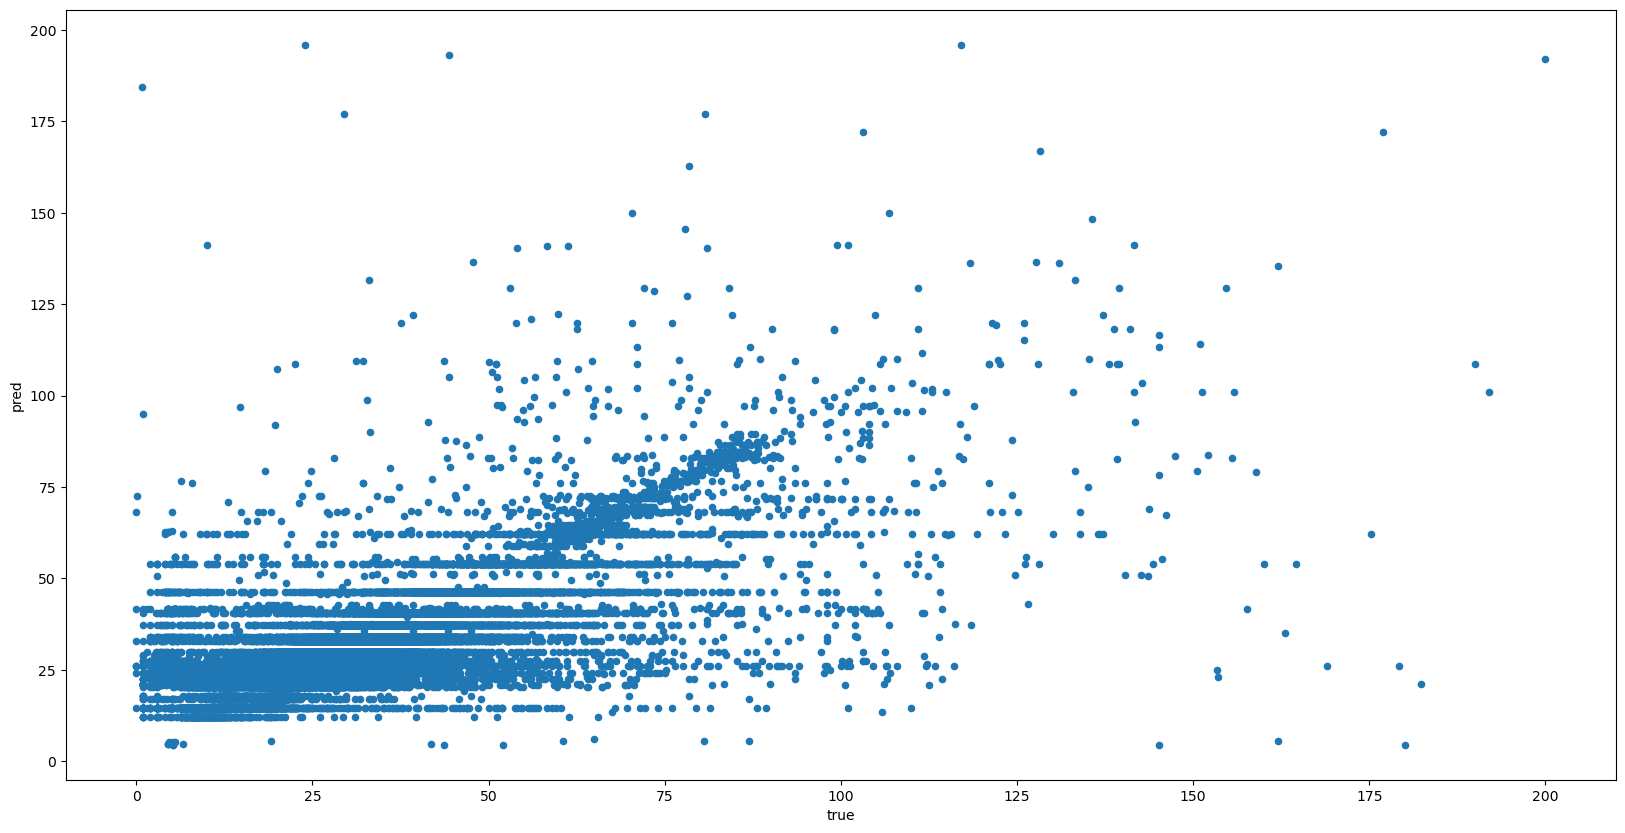

In [49]:
data = {"true": y_test_b, "pred": y_pred_b}
results = pd.DataFrame(data)

results.plot(kind="scatter", figsize=(20, 10), x="true", y="pred")

Could this be too good to be true?

# Fix problems

In [53]:
# Here trip_distance i not include because that optional
categorial_features_benchmark = [
    "PULocationID",
    "transaction_month",
    "transaction_day",
    "transaction_hour",
]
input_features_benchmark = categorial_features_benchmark
target_features_benchmark = "total_amount"

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bench, y_bench, test_size=0.3, random_state=42
)

# Fit a model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error", mean_squared_error(y_test_b, y_pred_b))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test_b, y_pred_b)))
print("r2", r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.502152739580572
mean_squared_error 200.25602005790054
root_mean_squared_error 14.151184404773353
r2 0.22704048353006823


<Axes: xlabel='true', ylabel='pred'>

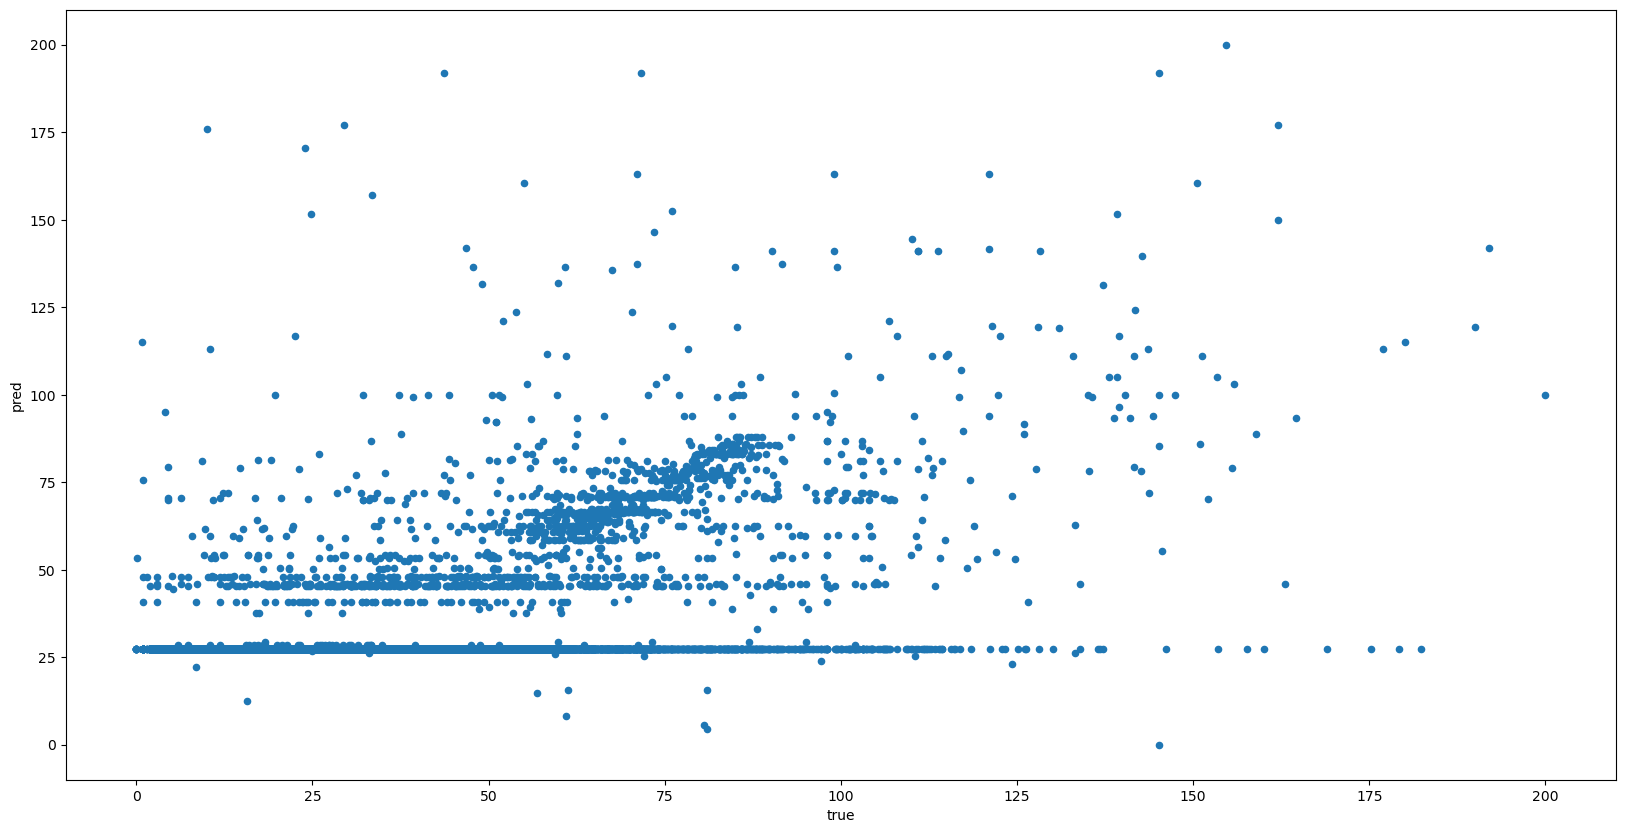

In [54]:
data = {"true": y_test_b, "pred": y_pred_b}
results = pd.DataFrame(data)

results.plot(kind="scatter", figsize=(20, 10), x="true", y="pred")

# Featuring engineering

In [55]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction
0,1,2025-03-01,3,1,5,0.00,0.75,1
1,1,2025-03-01,3,1,7,0.00,184.40,1
2,1,2025-03-01,3,1,13,0.07,128.00,1
3,1,2025-03-01,3,1,14,0.00,111.00,1
4,1,2025-03-01,3,1,17,0.00,61.20,1


In [56]:
data_with_new_features = taxi_grouped_by_region.copy()

**Date-related features**

In [58]:
data_with_new_features["transaction_week_day"] = data_with_new_features[
    "transaction_date"
].dt.weekday
data_with_new_features["weekend"] = data_with_new_features[
    "transaction_week_day"
].apply(lambda x: True if x == 5 or x == 6 else False)

In [59]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holiday = cal.holidays(start="2025", end="2025").date

data_with_new_features["is_holiday"] = data_with_new_features["transaction_date"].isin(
    holiday
)

/tmp/ipykernel_7452/3062683727.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holiday)


In [60]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transaction,transaction_week_day,weekend,is_holiday
0,1,2025-03-01,3,1,5,0.00,0.75,1,5,True,False
1,1,2025-03-01,3,1,7,0.00,184.40,1,5,True,False
2,1,2025-03-01,3,1,13,0.07,128.00,1,5,True,False
3,1,2025-03-01,3,1,14,0.00,111.00,1,5,True,False
4,1,2025-03-01,3,1,17,0.00,61.20,1,5,True,False
